In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("CV files//ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


# Data pre-processing

In [71]:
# Checking If there is any missing value
df.columns[df.isnull().any()]

Index([], dtype='object')

In [72]:
# Their is no missing value in our dataset that means we are good to go

# Find Important Columns

In [73]:
#Using Pearson Correlation
cor = df.corr()
cor_target = abs(cor["churn"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

tenure      0.376860
employ      0.337969
callcard    0.311451
loglong     0.336869
churn       1.000000
Name: churn, dtype: float64

In [74]:
y = df["churn"]
featureset = df[["tenure", "employ", "callcard", "loglong"]]
featureset.head()

,tenure,employ,callcard,loglong
0,11.0,5.0,1.0,1.482
1,33.0,0.0,0.0,2.246
2,23.0,2.0,0.0,1.841
3,38.0,10.0,1.0,1.800
4,7.0,15.0,1.0,1.960


# 70% of data for Training and 30% for Testing

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( featureset, y, test_size=0.3, random_state=4)
print ('Train set:', x_train.shape, y_train.shape)     # 140 rows for Training (70%)
print ('Test set:', x_test.shape, y_test.shape)       # 60 rows for Testing (30%)

Train set: (140, 4) (140,)
Test set: (60, 4) (60,)


# Decision Tree

[Text(1070.46875, 784.0384615384615, 'X[3] <= 2.387\nentropy = 0.872\nsamples = 140\nvalue = [99, 41]'),
 Text(862.1875, 721.3153846153846, 'X[1] <= 12.0\nentropy = 0.981\nsamples = 93\nvalue = [54, 39]'),
 Text(561.875, 658.5923076923077, 'X[0] <= 19.5\nentropy = 1.0\nsamples = 73\nvalue = [37, 36]'),
 Text(271.25, 595.8692307692307, 'X[3] <= 0.843\nentropy = 0.954\nsamples = 40\nvalue = [15, 25]'),
 Text(232.5, 533.1461538461538, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(310.0, 533.1461538461538, 'X[3] <= 1.417\nentropy = 0.927\nsamples = 38\nvalue = [13, 25]'),
 Text(193.75, 470.4230769230769, 'X[3] <= 1.315\nentropy = 1.0\nsamples = 14\nvalue = [7, 7]'),
 Text(155.0, 407.7, 'X[3] <= 1.216\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(116.25, 344.9769230769231, 'X[0] <= 10.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(77.5, 282.2538461538461, 'X[3] <= 1.039\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(38.75, 219.53076923076924, 'entropy = 0.0\

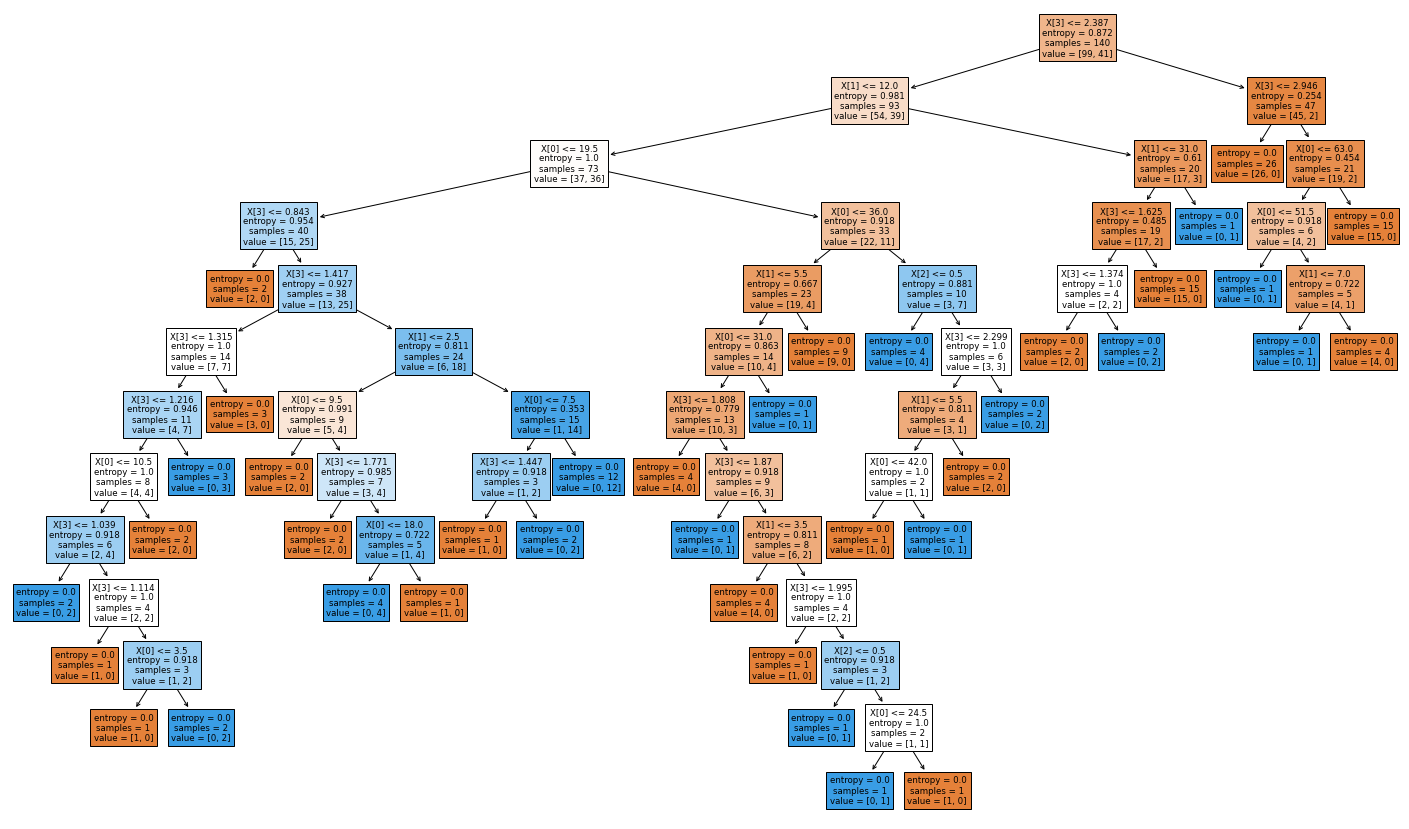

In [76]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
obj = DecisionTreeClassifier(criterion="entropy")
# Fit 
obj = obj.fit(x_train,y_train)
# Plot
plt.figure(figsize=(25,15))
tree.plot_tree(obj, filled = True)

In [77]:
inp = [[5.1, 3.5, 1.4, 0.2]]
out = obj.predict(inp)
print(out)

[0.]


# Accuracy

In [78]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, obj.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, obj.predict(x_test)))

Train set Accuracy:  1.0
Test set Accuracy:  0.6166666666666667


# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_estimators=20)
m.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

# Accuracy

In [61]:
print(n.score(x_test, y_test))
print(n.score(x_train,y_train))

0.7
1.0


# Adaboost

In [67]:
from sklearn.ensemble import AdaBoostClassifier
n = AdaBoostClassifier(base_estimator=None, n_estimators=200)
n.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=200)

# Accuracy

In [68]:
print(n.score(x_test, y_test))
print(n.score(x_train,y_train))

0.6
1.0


# VotingClassifier

In [64]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [65]:
mm = VotingClassifier(
    estimators=[('lr', LogisticRegression()),
                ('rf', RandomForestClassifier()),
                ('dtc', DecisionTreeClassifier()),                
                ('svm', svm.SVC(kernel='linear')),
                ('gnb', GaussianNB())], 
    voting='hard')
mm.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dtc', DecisionTreeClassifier()),
                             ('svm', SVC(kernel='linear')),
                             ('gnb', GaussianNB())])

# Accuracy

In [66]:
print(mm.score(x_test, y_test))
print(mm.score(x_train,y_train))

0.7166666666666667
0.8642857142857143
